# Household Income and the Subsequent COVID-19 Impact

This section of the project focuses on analyzing one of the most fundamental metrics of a nation's economic health: household income. With the world still reeling from the Coronavirus pandemic, its adverse effects have been widely felt by people and institutions belonging to all socio-economic strata. This analysis delves into the median income of US households while touching upon how COVID-19 has impacted the same. This study is executed through the following three segments:

   Segment I: Analyzing Overall Median Household Income
   
   Segment II: Analyzing Median Household Income across States
   
   Segment III: Analyzing Median Income Across Different Types of Households


## References:

All datasets are extracted from the United States Census Bureau at https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html

Information on confidentiality protection, sampling error, nonsampling error, and definitions is available at https://www2.census.gov/programs-surveys/cps/techdocs/cpsmar21.pdf

Source: U.S. Census Bureau, Current Population Survey, 1981 to 2021 Annual Social and Economic Supplements (CPS ASEC)

Households as of March of the following year. Income in current and 2020 CPI-U-RS adjusted dollars

All income figures are scaled in thousands of USD

In [1]:
# Importing the necessary packages:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

## Segment I: Analyzing Overall Median Household Income

Dataset used: 'Households by Total Money Income, Race, and Hispanic Origin of Householder' (Source linked above under References)

In [2]:
# Loading the excel dataset into dataframe
def col_check(n):
    return True
total_hh_income_df = pd.read_excel("Dataset\\Households by Total Money Income, Race, and Hispanic Origin of Householder.xlsx", header=7, usecols=col_check)

In [3]:
# Slicing the dataframe to get the total household income of past 10 years
total_hh_income_decade_df = total_hh_income_df.iloc[0:11]
total_hh_income_decade_df.rename(columns={"Race and Hispanic origin of householder and year": "Year", "Median income\n(dollars)": "Median Income"}, inplace=True)
total_hh_income_decade_df = total_hh_income_decade_df.drop(total_hh_income_decade_df.columns[[13, 14, 15]], axis=1)
display(total_hh_income_decade_df)

C:\Users\Nivedhitha\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Year,Number (thousands),Total,"Under $15,000","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 and over",Median Income
0,2020,129931,100,9.4,8.7,8.1,11.6,16.5,12.2,15.3,8,10.3,67521
1,2019,128451,100,8.9,8,8.3,11.6,16.5,12.2,15.7,8.4,10.5,69560
2,2018,128579,100,10,8.7,8.4,12,16.9,12.5,15.1,7.3,9,65127
3,2017,127586,100,10,9.1,9.1,11.9,16.2,12.4,15.1,7.5,8.8,64806
4,2016,126224,100,10.2,9.1,9.1,12.3,16.3,12.5,15,7.4,8.2,63683
5,2015,125819,100,10.5,9.7,9.7,11.9,16.2,12.4,15,7.2,7.4,61748
6,2014,124587,100,11.3,10.1,9.5,12.6,16.5,12.1,14.1,6.7,7,58725
7,2013,122952,100,11.2,10.4,9.7,12.3,17.5,12.4,13.9,6.4,6.2,57808
8,2012,122459,100,11.3,10.5,9.9,12.6,17.2,12.2,14,6.3,6.1,57623
9,2011,121084,100,11.2,10.3,10.1,13.1,17.1,11.9,13.9,6.3,6,57732


In [4]:
# Performing a quick sanity check to check for and resolve NaN
total_hh_income_decade_df.isnull().any()

# Cleaning the data by replacing NaN values (if any) with 0
total_hh_income_decade_df = total_hh_income_decade_df.replace(np.nan, 0)

display(total_hh_income_decade_df)

,Year,Number (thousands),Total,"Under $15,000","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 and over",Median Income
0,2020,129931,100,9.4,8.7,8.1,11.6,16.5,12.2,15.3,8,10.3,67521
1,2019,128451,100,8.9,8,8.3,11.6,16.5,12.2,15.7,8.4,10.5,69560
2,2018,128579,100,10,8.7,8.4,12,16.9,12.5,15.1,7.3,9,65127
3,2017,127586,100,10,9.1,9.1,11.9,16.2,12.4,15.1,7.5,8.8,64806
4,2016,126224,100,10.2,9.1,9.1,12.3,16.3,12.5,15,7.4,8.2,63683
5,2015,125819,100,10.5,9.7,9.7,11.9,16.2,12.4,15,7.2,7.4,61748
6,2014,124587,100,11.3,10.1,9.5,12.6,16.5,12.1,14.1,6.7,7,58725
7,2013,122952,100,11.2,10.4,9.7,12.3,17.5,12.4,13.9,6.4,6.2,57808
8,2012,122459,100,11.3,10.5,9.9,12.6,17.2,12.2,14,6.3,6.1,57623
9,2011,121084,100,11.2,10.3,10.1,13.1,17.1,11.9,13.9,6.3,6,57732


In [5]:
# Computing the percentage change of median income
total_hh_income_decade_df['Percentage Change'] = total_hh_income_decade_df['Median Income'].pct_change().round(decimals=2).replace(np.nan, 0)
total_hh_income_decade_df

,Year,Number (thousands),Total,"Under $15,000","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 and over",Median Income,Percentage Change
0,2020,129931,100,9.4,8.7,8.1,11.6,16.5,12.2,15.3,8,10.3,67521,0.00
1,2019,128451,100,8.9,8,8.3,11.6,16.5,12.2,15.7,8.4,10.5,69560,0.03
2,2018,128579,100,10,8.7,8.4,12,16.9,12.5,15.1,7.3,9,65127,-0.06
3,2017,127586,100,10,9.1,9.1,11.9,16.2,12.4,15.1,7.5,8.8,64806,-0.00
4,2016,126224,100,10.2,9.1,9.1,12.3,16.3,12.5,15,7.4,8.2,63683,-0.02
5,2015,125819,100,10.5,9.7,9.7,11.9,16.2,12.4,15,7.2,7.4,61748,-0.03
6,2014,124587,100,11.3,10.1,9.5,12.6,16.5,12.1,14.1,6.7,7,58725,-0.05
7,2013,122952,100,11.2,10.4,9.7,12.3,17.5,12.4,13.9,6.4,6.2,57808,-0.02
8,2012,122459,100,11.3,10.5,9.9,12.6,17.2,12.2,14,6.3,6.1,57623,-0.00
9,2011,121084,100,11.2,10.3,10.1,13.1,17.1,11.9,13.9,6.3,6,57732,0.00


In [6]:
# Descriptive statistics of income across all households
total_income_stats_df = pd.DataFrame(total_hh_income_decade_df['Median Income'].astype(int).describe().round(decimals=2))
display(total_income_stats_df)

,Median Income
count,11.00
mean,62087.27
std,4302.89
min,57623.00
25%,58217.50
50%,61748.00
75%,64966.50
max,69560.00


In [7]:
# Setting plot dimensions and style
rcParams['figure.figsize'] = 25,7
plt.style.use('fivethirtyeight')

Text(0, 0.5, 'Income ($ Thousands)')

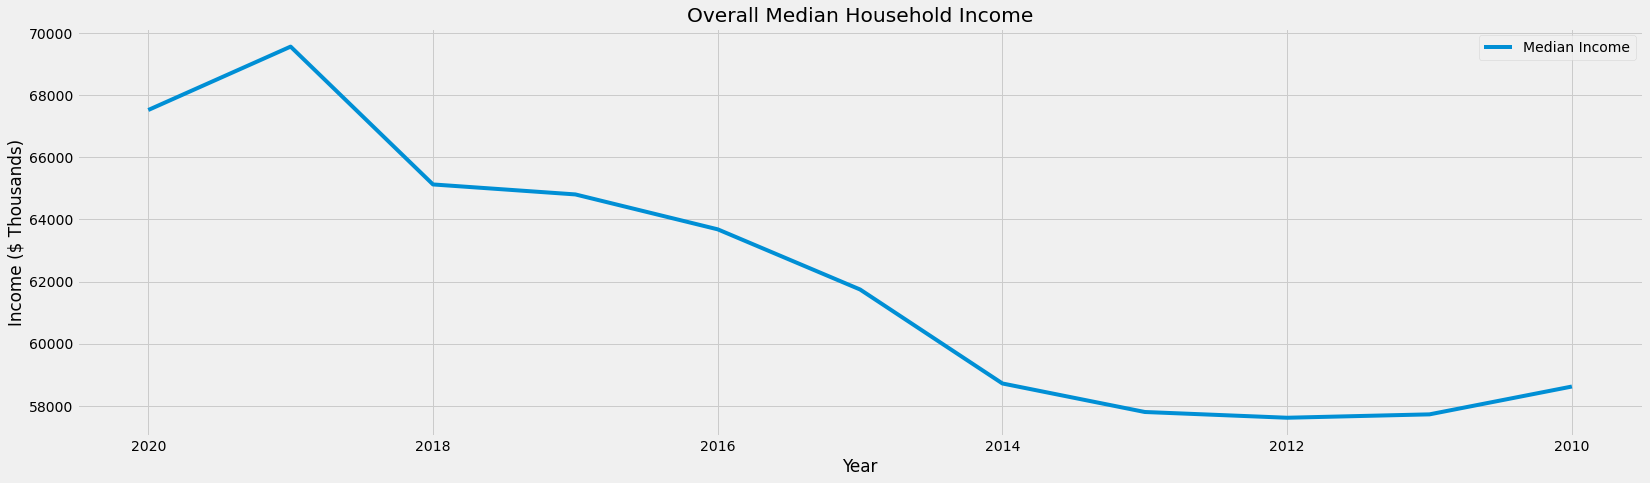

In [8]:
# Plotting total median household income data
total_hh_income_decade_df.plot(x ='Year', y='Median Income', kind = 'line', title='Overall Median Household Income')
plt.ylabel("Income ($ Thousands)")

,Year,Median Income
2,2018,65127
3,2017,64806
4,2016,63683
5,2015,61748
6,2014,58725
7,2013,57808
8,2012,57623
9,2011,57732
10,2010,58627


,Median Income
count,9.00
mean,60653.22
std,3187.34
min,57623.00
25%,57808.00
50%,58725.00
75%,63683.00
max,65127.00


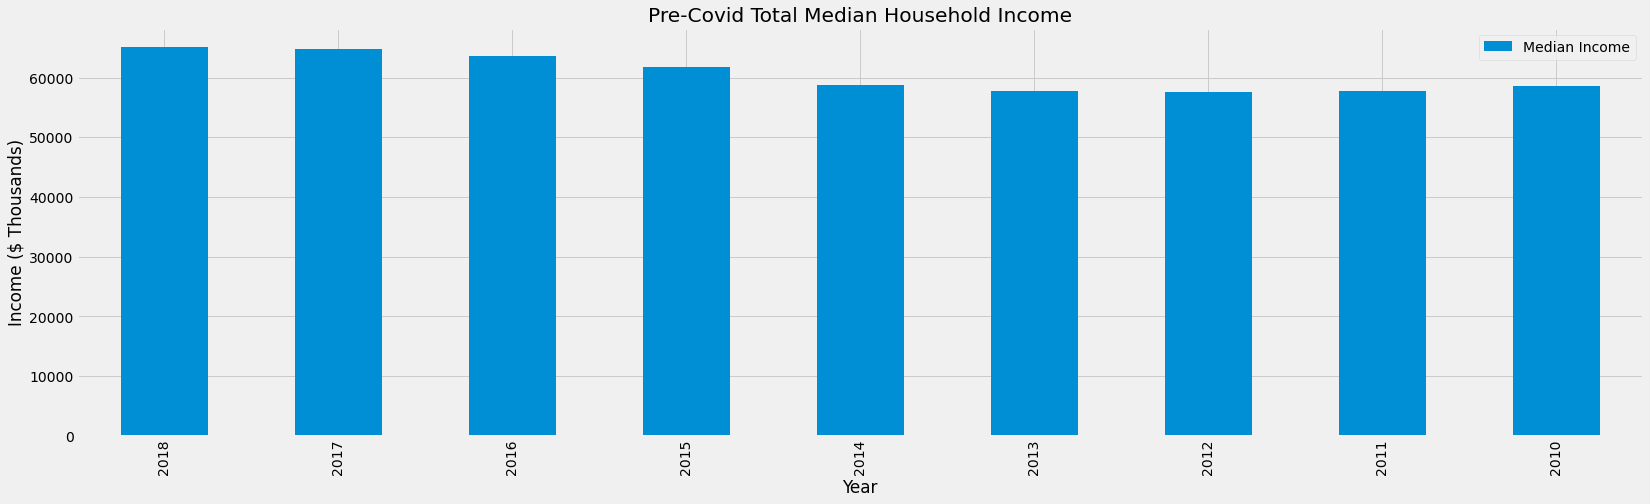

In [9]:
# Tracking changes in total median household income BEFORE Covid
pre_covid_income_df = total_hh_income_decade_df[['Year', 'Median Income']].iloc[2:11]
display(pre_covid_income_df)
pre_covid_income_stats_df = pd.DataFrame(pre_covid_income_df['Median Income'].astype(int).describe().round(decimals=2))
display(pre_covid_income_stats_df)

# Plotting pre-covid total median household income data
pre_covid_income_df.plot(x ='Year', y='Median Income', kind = 'bar', title='Pre-Covid Total Median Household Income')
plt.ylabel("Income ($ Thousands)")
plt.style.use('fivethirtyeight')

,Year,Median Income
0,2020,67521
1,2019,69560


,Median Income
count,2.00
mean,68540.50
std,1441.79
min,67521.00
25%,68030.75
50%,68540.50
75%,69050.25
max,69560.00


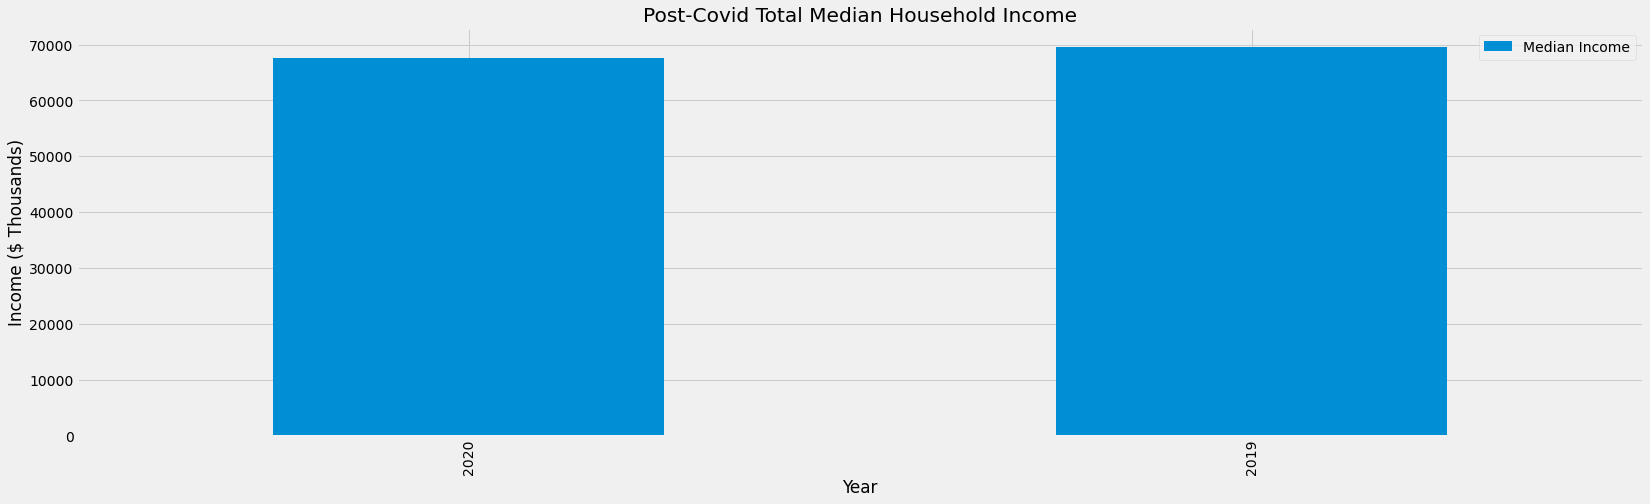

In [10]:
# Tracking changes in total median household income AFTER Covid
post_covid_income_df = total_hh_income_decade_df[['Year', 'Median Income']].iloc[0:2]
display(post_covid_income_df)
post_covid_income_stats_df = pd.DataFrame(post_covid_income_df['Median Income'].astype(int).describe().round(decimals=2))
display(post_covid_income_stats_df)

# Plotting pre-covid total median household income data
post_covid_income_df.plot(x ='Year', y='Median Income', kind = 'bar', title='Post-Covid Total Median Household Income')
plt.ylabel("Income ($ Thousands)")
plt.style.use('fivethirtyeight')

### Inferences from Segment I

1. Before COVID hit, there has been a fairly steady progression of household income ranging between 3 to 6 percent year on year.


2. However, the impact of COVID has been adverse enough to push the median household income down to a staggering negative 3 percent from 2019 to 2020.


3. This could be inferred from the fact that the 2020 median income was only USD 67,521 in comparison with the earlier 2019 median of USD 69,560. This is the first statistically significant decline in median household income since 2011.

## Segment II: Analyzing Median Household Income Across States

Dataset used: 'Median Household Income by State' (Source linked above under References)

In [11]:
# Loading the excel dataset into dataframe
def col_check(n):
    return True
state_median_income_df = pd.read_excel("Dataset\\Median Household Income by State.xlsx", header=7, usecols=col_check)

# Slicing the dataframe to get the state-wise median income data of past 10 years
state_median_income_decade_df = state_median_income_df.iloc[:, 0:12]
display(state_median_income_decade_df)

,State,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,United States,67521,69560,65127,64806,63683,61748,58725,57808,57623,57732,58627
1,Alabama,54393,56901,51475,53973,50936,48629,46272,46057,49092,49123,48701
2,Alaska,74476,79373,70853,76273,81680,82066,74017,68045,71889,66241,68825
3,Arizona,66628,71556,64203,64545,61592,57085,53906,56320,53135,56080,55795
4,Arkansas,50540,55220,51316,51561,49518,46760,49165,44430,44070,47638,45909
5,California,77358,79080,72662,73662,71879,69527,66201,64028,64403,61554,64584
6,Colorado,82611,73404,75285,78322,76117,72761,66696,70531,64668,67623,71663
7,Connecticut,79043,88380,75057,76852,81895,79637,76788,75440,72566,75450,78522
8,Delaware,69132,75120,67016,65805,62612,63103,62955,58119,55313,63045,65692
9,District of Columbia,88311,94273,88393,88048,76566,76558,74726,67531,73694,63727,67731


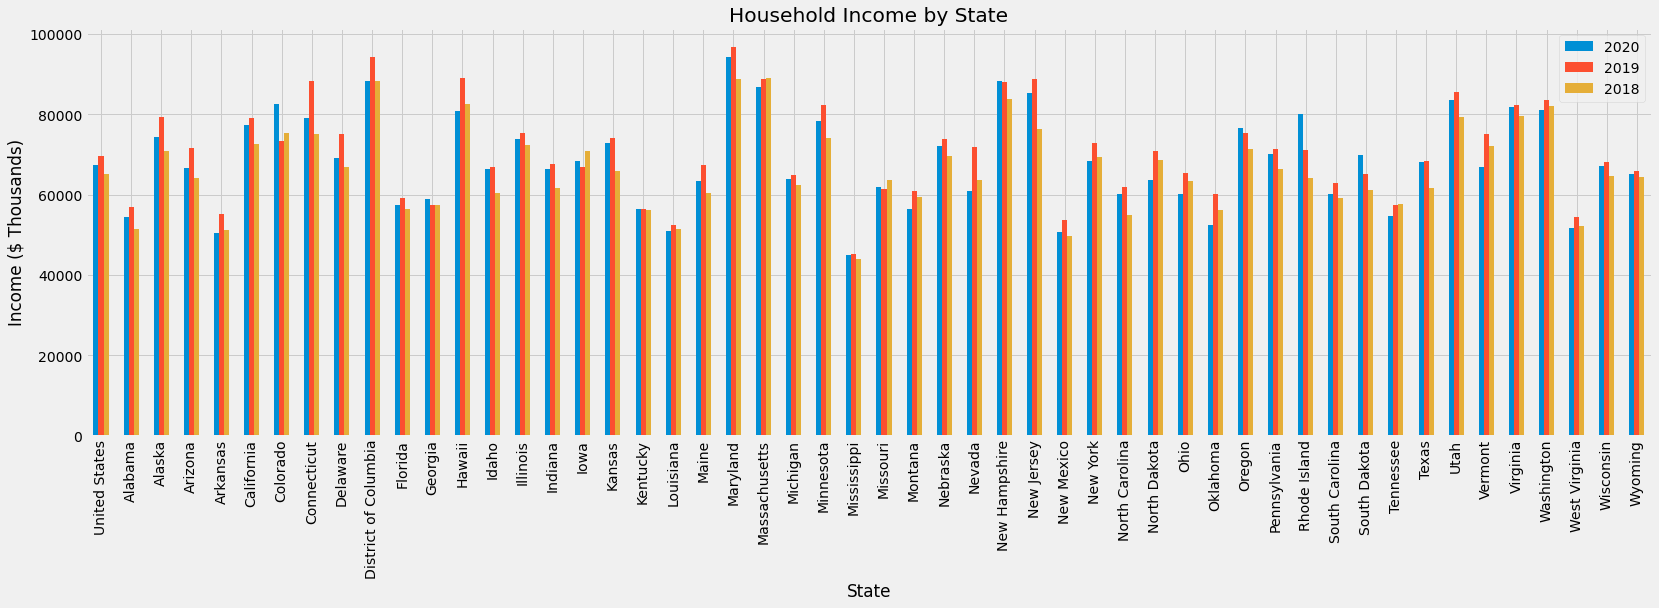

In [12]:
# Plotting median household income data by states from 2018 to 2020
state_median_income_decade_plot_df = state_median_income_decade_df.iloc[:, 0:4]
state_median_income_decade_plot_df.plot(x='State', kind='bar', stacked=False, title='Household Income by State')
plt.ylabel("Income ($ Thousands)")
plt.style.use('fivethirtyeight')

In [13]:
# Transposing the dataframe for smoother statistical analysis
state_median_income_decade_trans_df = state_median_income_decade_df.transpose()

# Assigning the header row
state_median_income_decade_trans_df.columns = state_median_income_decade_trans_df.iloc[0]

# Removing duplicate header in first row
state_median_income_decade_trans_df = state_median_income_decade_trans_df[1:]

display(state_median_income_decade_trans_df)

State,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2020,67521,54393,74476,66628,50540,77358,82611,79043,69132,88311,...,69787,54665,68093,83670,66902,81947,81083,51615,67094,65108
2019,69560,56901,79373,71556,55220,79080,73404,88380,75120,94273,...,65057,57334,68286,85578,75233,82328,83483,54376,68196,65947
2018,65127,51475,70853,64203,51316,72662,75285,75057,67016,88393,...,61296,57788,61628,79443,72226,79529,82184,52132,64560,64467
2017,64806,53973,76273,64545,51561,73662,78322,76852,65805,88048,...,60078,58331,62613,75310,67375,75282,79638,47932,67001,61073
2016,63683,50936,81680,61592,49518,71879,76117,81895,62612,76566,...,61969,55383,62720,72789,65623,71678,75841,47843,64522,62378
2015,61748,48629,82066,57085,46760,69527,72761,79637,63103,76558,...,60163,51712,61701,72392,65002,67178,73468,46789,60556,66565
2014,58725,46272,74017,53906,49165,66201,66696,76788,62955,74726,...,58064,47845,58964,69370,66442,72404,64647,43288,63566,60950
2013,57808,46057,68045,56320,44430,64028,70531,75440,58119,67531,...,60606,47301,59019,70082,61039,75261,66898,44788,61502,61994
2012,57623,49092,71889,53135,44070,64403,64668,72566,55313,73694,...,55813,48562,58649,65895,62779,73001,70239,49192,59952,64959
2011,57732,49123,66241,56080,47638,61554,67623,75450,63045,63727,...,54467,48765,56571,64006,59818,72222,65571,48237,60044,62871


In [14]:
# Descriptive statistics for median household income by state
state_median_income_decade_trans_df.astype(int).describe().round(decimals=2)

State,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,...,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.0,11.00,11.00
mean,62087.27,50504.73,73976.18,60076.82,48738.82,69539.82,72698.27,78148.18,64355.64,78141.64,...,60114.36,52145.45,61316.27,73272.36,66270.91,74786.55,73624.82,48826.0,63354.45,63492.64
std,4302.89,3428.74,5432.34,5980.10,3378.53,5836.09,5299.14,4251.43,5278.29,10158.99,...,4642.95,4680.81,4057.83,7086.94,4480.38,4721.13,7180.76,3273.5,3150.78,1982.09
min,57623.00,46057.00,66241.00,53135.00,44070.00,61554.00,64668.00,72566.00,55313.00,63727.00,...,53958.00,45914.00,56235.00,64006.00,59818.00,67178.00,64647.00,43288.0,59906.00,60950.00
25%,58217.50,48665.00,69839.00,55937.50,46334.50,64493.50,69077.00,75445.00,62783.50,70712.50,...,56938.50,48203.50,58806.50,68415.50,63890.50,72022.00,66859.50,47316.0,60300.00,62050.50
50%,61748.00,49123.00,74017.00,57085.00,49165.00,69527.00,72761.00,76852.00,63103.00,76558.00,...,60163.00,51712.00,61628.00,72392.00,66442.00,73001.00,73468.00,48237.0,63566.00,62871.00
75%,64966.50,52724.00,77823.00,64374.00,50928.00,73162.00,75701.00,79340.00,66410.50,88179.50,...,61632.50,56358.50,62666.50,77376.50,67138.50,77405.50,80360.50,51254.5,65780.50,65033.50
max,69560.00,56901.00,82066.00,71556.00,55220.00,79080.00,82611.00,88380.00,75120.00,94273.00,...,69787.00,58331.00,68286.00,85578.00,75233.00,82328.00,83483.00,54376.0,68196.00,66565.00


In [15]:
# Computing the percentage change of median household income by state
state_median_income_decade_pct_change_df = state_median_income_decade_trans_df.pct_change().round(decimals=2).replace(np.nan, 0)
display(state_median_income_decade_pct_change_df)

State,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2020,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2019,0.03,0.05,0.07,0.07,0.09,0.02,-0.11,0.12,0.09,0.07,...,-0.07,0.05,0.00,0.02,0.12,0.00,0.03,0.05,0.02,0.01
2018,-0.06,-0.10,-0.11,-0.10,-0.07,-0.08,0.03,-0.15,-0.11,-0.06,...,-0.06,0.01,-0.10,-0.07,-0.04,-0.03,-0.02,-0.04,-0.05,-0.02
2017,-0.00,0.05,0.08,0.01,0.00,0.01,0.04,0.02,-0.02,-0.00,...,-0.02,0.01,0.02,-0.05,-0.07,-0.05,-0.03,-0.08,0.04,-0.05
2016,-0.02,-0.06,0.07,-0.05,-0.04,-0.02,-0.03,0.07,-0.05,-0.13,...,0.03,-0.05,0.00,-0.03,-0.03,-0.05,-0.05,-0.00,-0.04,0.02
2015,-0.03,-0.05,0.00,-0.07,-0.06,-0.03,-0.04,-0.03,0.01,-0.00,...,-0.03,-0.07,-0.02,-0.01,-0.01,-0.06,-0.03,-0.02,-0.06,0.07
2014,-0.05,-0.05,-0.10,-0.06,0.05,-0.05,-0.08,-0.04,-0.00,-0.02,...,-0.03,-0.07,-0.04,-0.04,0.02,0.08,-0.12,-0.07,0.05,-0.08
2013,-0.02,-0.00,-0.08,0.04,-0.10,-0.03,0.06,-0.02,-0.08,-0.10,...,0.04,-0.01,0.00,0.01,-0.08,0.04,0.03,0.03,-0.03,0.02
2012,-0.00,0.07,0.06,-0.06,-0.01,0.01,-0.08,-0.04,-0.05,0.09,...,-0.08,0.03,-0.01,-0.06,0.03,-0.03,0.05,0.10,-0.03,0.05
2011,0.00,0.00,-0.08,0.06,0.08,-0.04,0.05,0.04,0.14,-0.14,...,-0.02,0.00,-0.04,-0.03,-0.05,-0.01,-0.07,-0.02,0.00,-0.03


In [16]:
# Sorting the states by greatest % decrease in income post-Covid
state_median_income_decline_comparison_df = state_median_income_decade_pct_change_df.iloc[1, 1:52].transpose().reset_index().sort_values(by=[2019], ascending=False)
state_median_income_decline_comparison_df.rename(columns={2019: 'Post-Covid % Decline in Income'}, inplace=True)
display(state_median_income_decline_comparison_df)

,State,Post-Covid % Decline in Income
28,Nevada,0.18
36,Oklahoma,0.15
6,Connecticut,0.12
45,Vermont,0.12
34,North Dakota,0.11
11,Hawaii,0.10
3,Arkansas,0.09
35,Ohio,0.09
7,Delaware,0.09
26,Montana,0.08


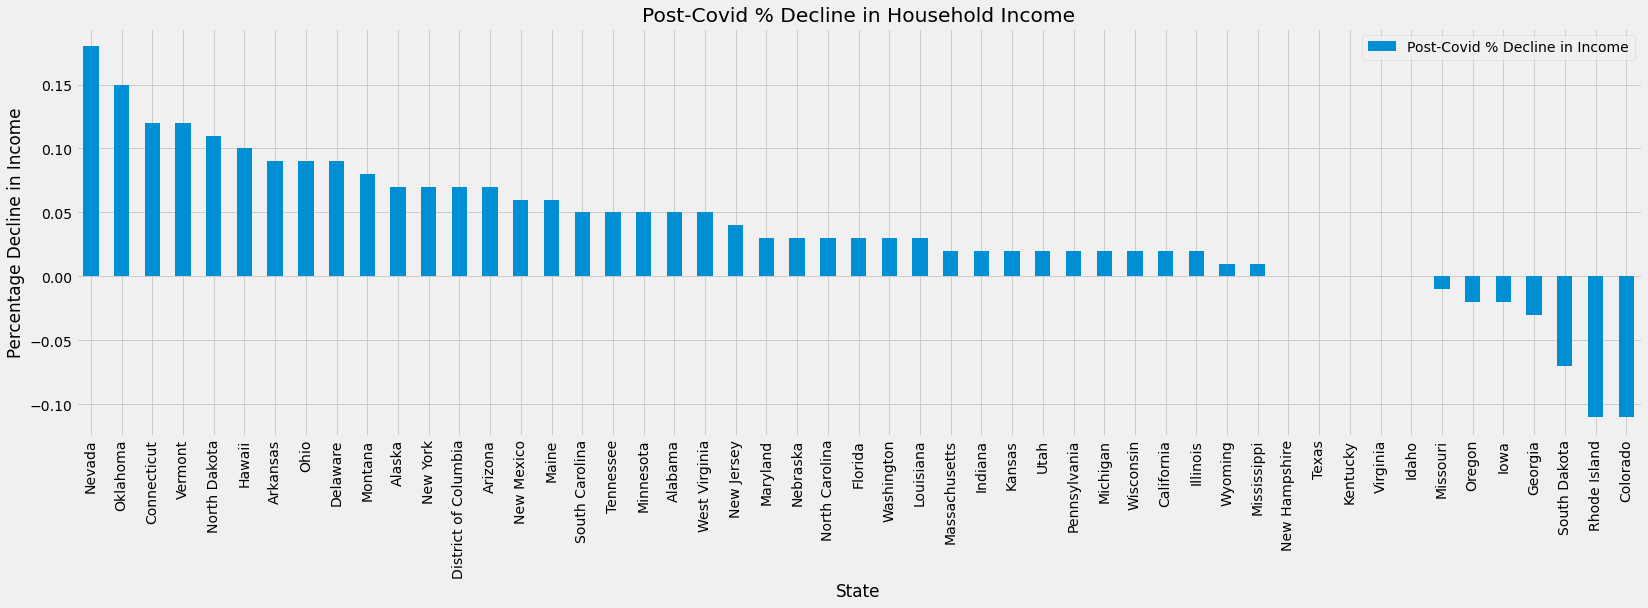

In [17]:
# Plotting post-Covid % decline in income (highest to least)
state_median_income_decline_comparison_df.plot(x = 'State', kind = 'bar', title='Post-Covid % Decline in Household Income')
plt.ylabel("Percentage Decline in Income")
plt.style.use('fivethirtyeight')

### Inferences from Segment II

1. While mapping the composition of national decline, it is evident that COVID has substantially reduced the individual median income earned by the population in all US states.


2. In particular, ranking the percentage decrease of median income has shown that the following 6 states have been the worst hit of all, since their decline measures over 10%


    (i) Nevada at 18%
    (ii) Oklahoma at 15%
    (iii) Connecticut at 12%
    (iv) Vermont at 12%
    (v) North Dakota at 11%
    (vi) Hawaii at 10%

3. Of all 50 US states, only the following three have reported a positive growth of over 5 percent:


    (i) South Dakota at 7%
    (ii) Rhode Island at 11%
    (iii) Colorado at 11%

## Segment III: Analyzing Median Income Across Different Types of Households

Dataset used: 'Type of Household - All Households by Median and Mean Income' (Source linked above under References)

### All household data

In [18]:
# Loading the excel dataset into dataframe
def col_check(n):
    return True
all_hh_df = pd.read_excel("Dataset\\Type of Household by Median and Mean Income.xlsx", header=7, usecols=col_check)
all_hh_df.rename(columns={'Type of household\nand year': 'Year', 'Median Income - 2020\ndollars': 'Overall Income'}, inplace=True)
all_hh_df = all_hh_df.drop(all_hh_df.columns[[1, 2, 4, 5]], axis=1)

# Get all household data for past 10 years
all_hh_decade_df = all_hh_df.iloc[0:11]
display(all_hh_decade_df)

,Year,Overall Income
0,2020,67521
1,2019,69560
2,2018,65127
3,2017,64557
4,2016,63683
5,2015,61748
6,2014,58725
7,2013,59640
8,2012,57623
9,2011,57732


### 1. Family households

In [19]:
# Getting family household data for past 10 years from the base dataset
family_hh_decade_df = all_hh_df.iloc[43:54]
family_hh_decade_df.rename(columns={'Overall Income': 'Family Income'}, inplace=True)

# Merge family median 2020 income to all hh data
merge_median_2020_all_hh_df = pd.merge(all_hh_decade_df, family_hh_decade_df, how='inner', on= 'Year')
display(merge_median_2020_all_hh_df)

C:\Users\Nivedhitha\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Year,Overall Income,Family Income
0,2020,67521,86372
1,2019,69560,89249
2,2018,65127,83150
3,2017,64557,82149
4,2016,63683,80967
5,2015,61748,78846
6,2014,58725,74889
7,2013,59640,74485
8,2012,57623,72347
9,2011,57732,71826


#### 1.1 Married Couple Family Household

In [20]:
# Get married family household data for past 10 years from the base dataset
married_family_hh_decade_df = all_hh_df.iloc[86:97]
married_family_hh_decade_df.rename(columns={'Overall Income': 'Married Family Income'}, inplace=True)

# Merge married family median 2020 income to all hh data
merge_median_2020_all_hh_df = pd.merge(merge_median_2020_all_hh_df, married_family_hh_decade_df, how='inner', on= 'Year')
display(merge_median_2020_all_hh_df)

C:\Users\Nivedhitha\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Year,Overall Income,Family Income,Married Family Income
0,2020,67521,86372,101517
1,2019,69560,89249,103585
2,2018,65127,83150,96541
3,2017,64557,82149,96440
4,2016,63683,80967,93905
5,2015,61748,78846,92460
6,2014,58725,74889,88679
7,2013,59640,74485,87812
8,2012,57623,72347,85495
9,2011,57732,71826,85502


#### 1.2 Family Households: Male Householder (No Spouse Present)

In [21]:
# Get male family household data for past 10 years from the base dataset
male_family_hh_decade_df = all_hh_df.iloc[129:140]
male_family_hh_decade_df.rename(columns={'Overall Income': 'Male Family Income'}, inplace=True)

# Merge male family median 2020 income to all hh data
merge_median_2020_all_hh_df = pd.merge(merge_median_2020_all_hh_df, male_family_hh_decade_df, how='inner', on= 'Year')
display(merge_median_2020_all_hh_df)

C:\Users\Nivedhitha\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Year,Overall Income,Family Income,Married Family Income,Male Family Income
0,2020,67521,86372,101517,67304
1,2019,69560,89249,103585,70108
2,2018,65127,83150,96541,63414
3,2017,64557,82149,96440,61475
4,2016,63683,80967,93905,62618
5,2015,61748,78846,92460,61032
6,2014,58725,74889,88679,58755
7,2013,59640,74485,87812,58410
8,2012,57623,72347,85495,54931
9,2011,57732,71826,85502,57171


#### 1.3 Family Households: Female Householder (No Spouse Present)

In [22]:
# Get female family household data for past 10 years from the base dataset
female_family_hh_decade_df = all_hh_df.iloc[172:183]
female_family_hh_decade_df.rename(columns={'Overall Income': 'Female Family Income'}, inplace=True)

# Merge female family median 2020 income to all hh data
merge_median_2020_all_hh_df = pd.merge(merge_median_2020_all_hh_df, female_family_hh_decade_df, how='inner', on= 'Year')
display(merge_median_2020_all_hh_df)

C:\Users\Nivedhitha\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Year,Overall Income,Family Income,Married Family Income,Male Family Income,Female Family Income
0,2020,67521,86372,101517,67304,49214
1,2019,69560,89249,103585,70108,48698
2,2018,65127,83150,96541,63414,46519
3,2017,64557,82149,96440,61475,43984
4,2016,63683,80967,93905,62618,44254
5,2015,61748,78846,92460,61032,41296
6,2014,58725,74889,88679,58755,39566
7,2013,59640,74485,87812,58410,39413
8,2012,57623,72347,85495,54931,38405
9,2011,57732,71826,85502,57171,38797


### 2. Non-Family Households

In [23]:
# Get non-family household data for past 10 years from the base dataset
non_family_hh_decade_df = all_hh_df.iloc[215:226]
non_family_hh_decade_df.rename(columns={'Overall Income': 'Non-Family Income'}, inplace=True)

# Merge non-family median 2020 income to all hh data
merge_median_2020_all_hh_df = pd.merge(merge_median_2020_all_hh_df, non_family_hh_decade_df, how='inner', on= 'Year')
display(merge_median_2020_all_hh_df)

C:\Users\Nivedhitha\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Year,Overall Income,Family Income,Married Family Income,Male Family Income,Female Family Income,Non-Family Income
0,2020,67521,86372,101517,67304,49214,40464
1,2019,69560,89249,103585,70108,48698,41747
2,2018,65127,83150,96541,63414,46519,39297
3,2017,64557,82149,96440,61475,43984,38377
4,2016,63683,80967,93905,62618,44254,38574
5,2015,61748,78846,92460,61032,41296,36935
6,2014,58725,74889,88679,58755,39566,35074
7,2013,59640,74485,87812,58410,39413,35037
8,2012,57623,72347,85495,54931,38405,34878
9,2011,57732,71826,85502,57171,38797,34857


#### 2.1 Non-family Households: Male Householder 

In [24]:
# Get male non-family household data for past 10 years from the base dataset
male_non_family_hh_decade_df = all_hh_df.iloc[258:269]
male_non_family_hh_decade_df.rename(columns={'Overall Income': 'Male Non-Family Income'}, inplace=True)

# Merge male non-family median 2020 income to all hh data
merge_median_2020_all_hh_df = pd.merge(merge_median_2020_all_hh_df, male_non_family_hh_decade_df, how='inner', on= 'Year')
display(merge_median_2020_all_hh_df)

C:\Users\Nivedhitha\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Year,Overall Income,Family Income,Married Family Income,Male Family Income,Female Family Income,Non-Family Income,Male Non-Family Income
0,2020,67521,86372,101517,67304,49214,40464,47259
1,2019,69560,89249,103585,70108,48698,41747,49101
2,2018,65127,83150,96541,63414,46519,39297,47164
3,2017,64557,82149,96440,61475,43984,38377,45195
4,2016,63683,80967,93905,62618,44254,38574,45033
5,2015,61748,78846,92460,61032,41296,36935,44536
6,2014,58725,74889,88679,58755,39566,35074,42882
7,2013,59640,74485,87812,58410,39413,35037,43829
8,2012,57623,72347,85495,54931,38405,34878,41778
9,2011,57732,71826,85502,57171,38797,34857,40925


#### 2.2 Non-family Households: Female Householder 

In [25]:
# Get female non-family household data for past 10 years from the base dataset
female_non_family_hh_decade_df = all_hh_df.iloc[337:348]
female_non_family_hh_decade_df.rename(columns={'Overall Income': 'Female Non-Family Income'}, inplace=True)

# Merge female non-family median 2020 income to all hh data
merge_median_2020_all_hh_df = pd.merge(merge_median_2020_all_hh_df, female_non_family_hh_decade_df, how='inner', on= 'Year')
merge_median_2020_all_hh_df = merge_median_2020_all_hh_df.set_index('Year')
display(merge_median_2020_all_hh_df)

C:\Users\Nivedhitha\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Overall Income,Family Income,Married Family Income,Male Family Income,Female Family Income,Non-Family Income,Male Non-Family Income,Female Non-Family Income
Year,,,,,,,,
2020,67521,86372,101517,67304,49214,40464,47259,35574
2019,69560,89249,103585,70108,48698,41747,49101,35044
2018,65127,83150,96541,63414,46519,39297,47164,32994
2017,64557,82149,96440,61475,43984,38377,45195,32899
2016,63683,80967,93905,62618,44254,38574,45033,32977
2015,61748,78846,92460,61032,41296,36935,44536,31709
2014,58725,74889,88679,58755,39566,35074,42882,29192
2013,59640,74485,87812,58410,39413,35037,43829,29203
2012,57623,72347,85495,54931,38405,34878,41778,29385


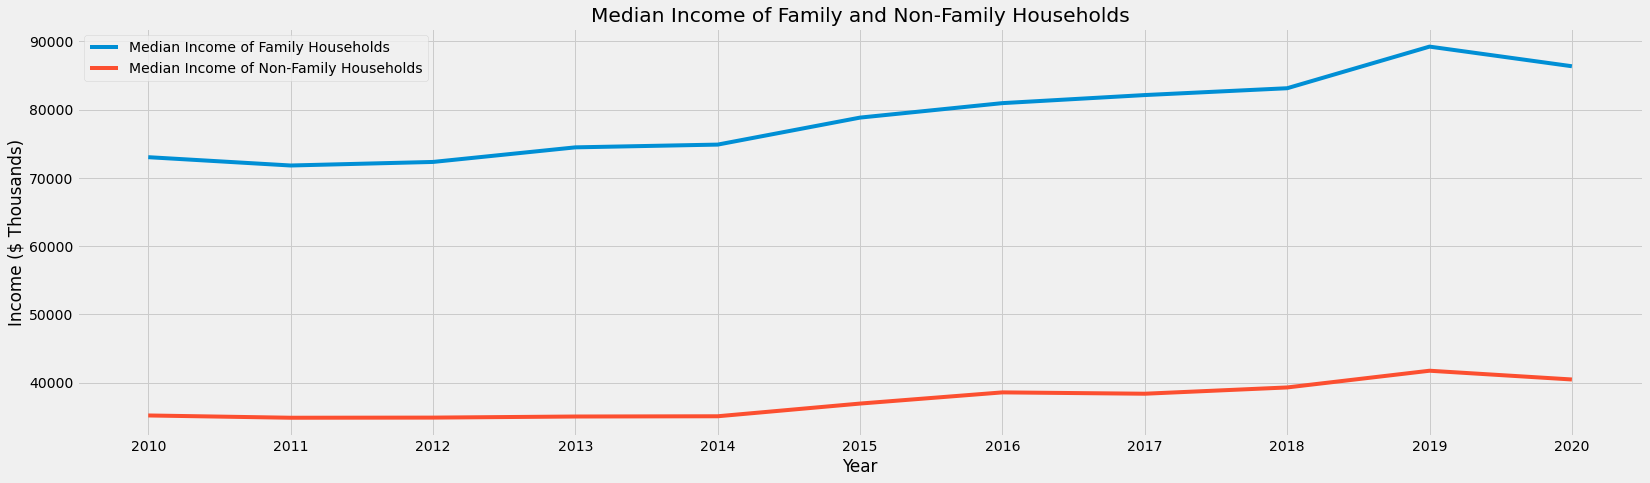

In [26]:
# Bifurcating overall household data into family and non-family for clustered bar plots
bifurcated_df = merge_median_2020_all_hh_df.drop(merge_median_2020_all_hh_df.columns[[0, 2, 3, 4, 6, 7]], axis=1)
bifurcated_df
#bifurcated_df = bifurcated_df.set_index('Year')

plt.plot(bifurcated_df['Family Income'], label='Median Income of Family Households')
plt.plot(bifurcated_df['Non-Family Income'], label='Median Income of Non-Family Households')
plt.title("Median Income of Family and Non-Family Households")
plt.xlabel("Year")
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
plt.ylabel("Income ($ Thousands)")
plt.legend()
plt.style.use('fivethirtyeight')

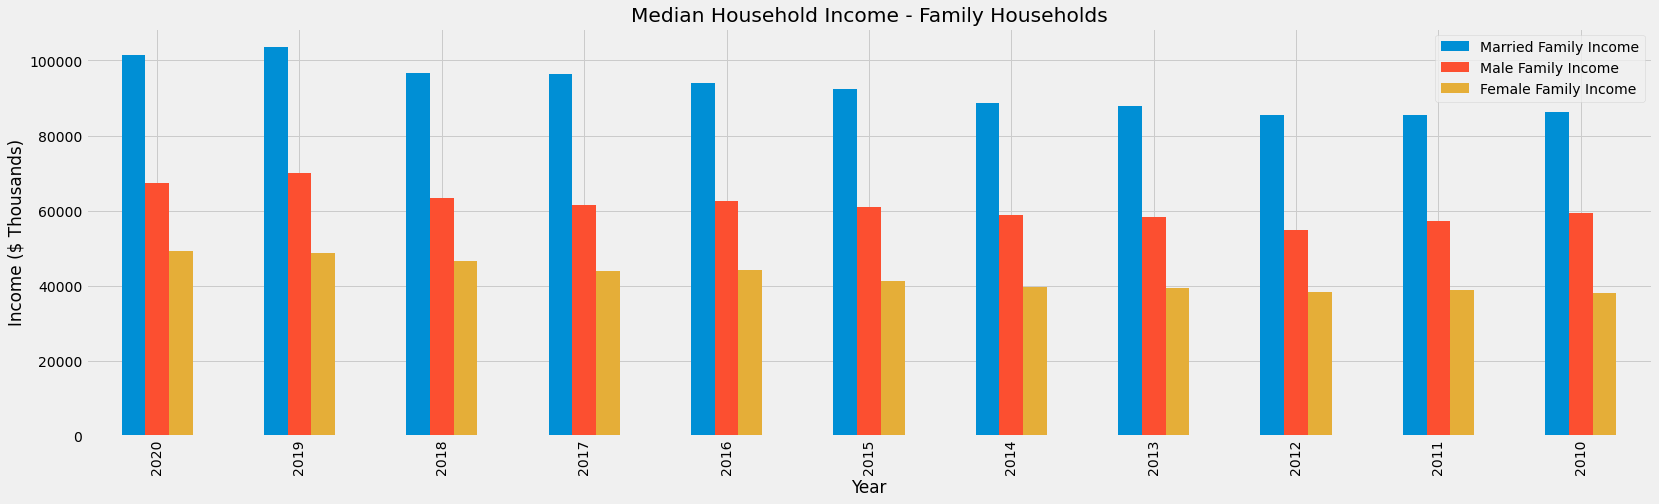

In [27]:
# Bifurcating family household data into married, male, and female for clustered bar plots
family_df = merge_median_2020_all_hh_df.drop(merge_median_2020_all_hh_df.columns[[0, 1, 5, 6, 7]], axis=1)
family_df.plot(kind='bar', stacked=False, title='Median Household Income - Family Households')
plt.ylabel("Income ($ Thousands)")
plt.style.use('fivethirtyeight')

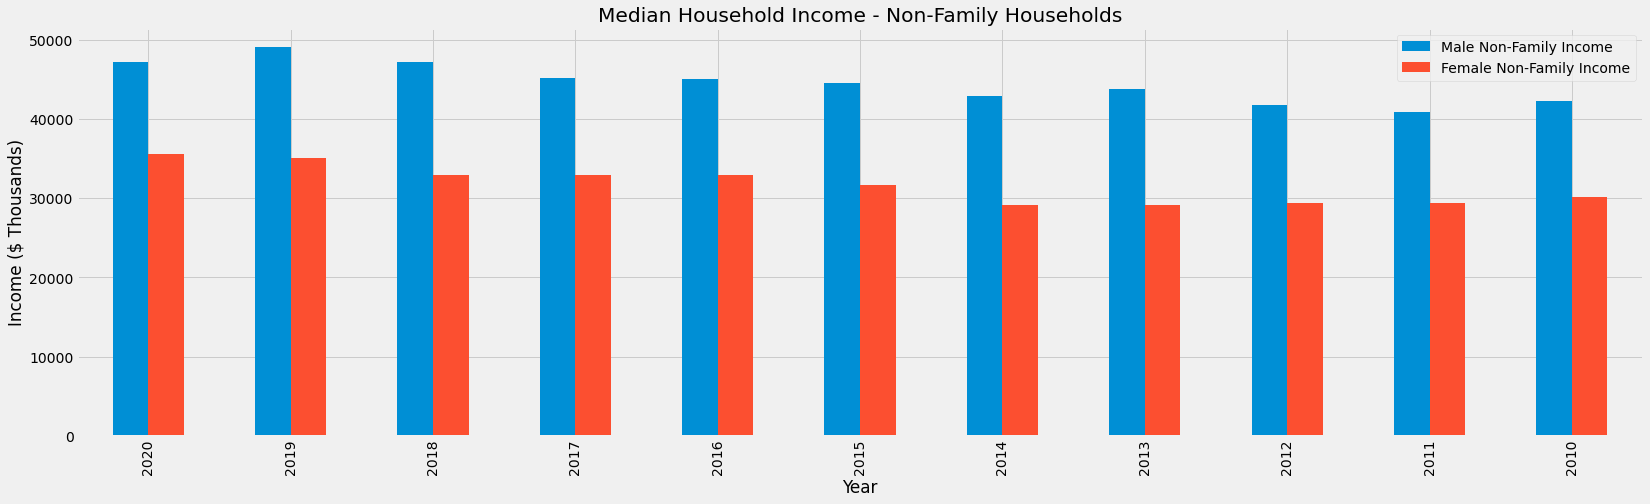

In [28]:
# Bifurcating non-family household data into male and female for clustered bar plots
non_family_df = merge_median_2020_all_hh_df.drop(merge_median_2020_all_hh_df.columns[[0, 1, 2, 3, 4, 5]], axis=1)
non_family_df.plot(kind='bar', stacked=False, title='Median Household Income - Non-Family Households')
plt.ylabel("Income ($ Thousands)")
plt.style.use('fivethirtyeight')

In [29]:
# Descriptive statistics of income across all households
merge_median_2020_all_hh_df.astype(int).describe().round(decimals=2)

,Overall Income,Family Income,Married Family Income,Male Family Income,Female Family Income,Non-Family Income,Male Non-Family Income,Female Non-Family Income
count,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00
mean,62231.18,78847.73,92562.55,61316.73,42562.09,37311.91,44538.36,31687.09
std,4138.91,5988.67,6415.81,4432.98,4181.73,2510.93,2551.21,2375.04
min,57623.00,71826.00,85495.00,54931.00,38037.00,34857.00,40925.00,29192.00
25%,58676.00,73765.00,87032.00,58582.50,39105.00,35055.50,42551.00,29394.00
50%,61748.00,78846.00,92460.00,61032.00,41296.00,36935.00,44536.00,31709.00
75%,64842.00,82649.50,96490.50,63016.00,45386.50,38935.50,46179.50,32985.50
max,69560.00,89249.00,103585.00,70108.00,49214.00,41747.00,49101.00,35574.00


In [30]:
# Computing the percentage change of income over 10 years
hh_median_income_decade_pct_change_df = merge_median_2020_all_hh_df.apply(pd.to_numeric).pct_change().replace(np.nan, 0).round(decimals=2)
display(hh_median_income_decade_pct_change_df)

,Overall Income,Family Income,Married Family Income,Male Family Income,Female Family Income,Non-Family Income,Male Non-Family Income,Female Non-Family Income
Year,,,,,,,,
2020,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2019,0.03,0.03,0.02,0.04,-0.01,0.03,0.04,-0.01
2018,-0.06,-0.07,-0.07,-0.10,-0.04,-0.06,-0.04,-0.06
2017,-0.01,-0.01,-0.00,-0.03,-0.05,-0.02,-0.04,-0.00
2016,-0.01,-0.01,-0.03,0.02,0.01,0.01,-0.00,0.00
2015,-0.03,-0.03,-0.02,-0.03,-0.07,-0.04,-0.01,-0.04
2014,-0.05,-0.05,-0.04,-0.04,-0.04,-0.05,-0.04,-0.08
2013,0.02,-0.01,-0.01,-0.01,-0.00,-0.00,0.02,0.00
2012,-0.03,-0.03,-0.03,-0.06,-0.03,-0.00,-0.05,0.01


In [31]:
# Sorting the households by greatest % decrease in income post-Covid
hh_median_income_decline_comparison_df = hh_median_income_decade_pct_change_df.iloc[1, 1:8].transpose().reset_index().sort_values(by=[2019], ascending=False)
hh_median_income_decline_comparison_df.rename(columns={2019: 'Post-Covid % Decline in Income', 'index': 'Type of Household'}, inplace=True)
display(hh_median_income_decline_comparison_df)

,Type of Household,Post-Covid % Decline in Income
2,Male Family Income,0.04
5,Male Non-Family Income,0.04
0,Family Income,0.03
4,Non-Family Income,0.03
1,Married Family Income,0.02
3,Female Family Income,-0.01
6,Female Non-Family Income,-0.01


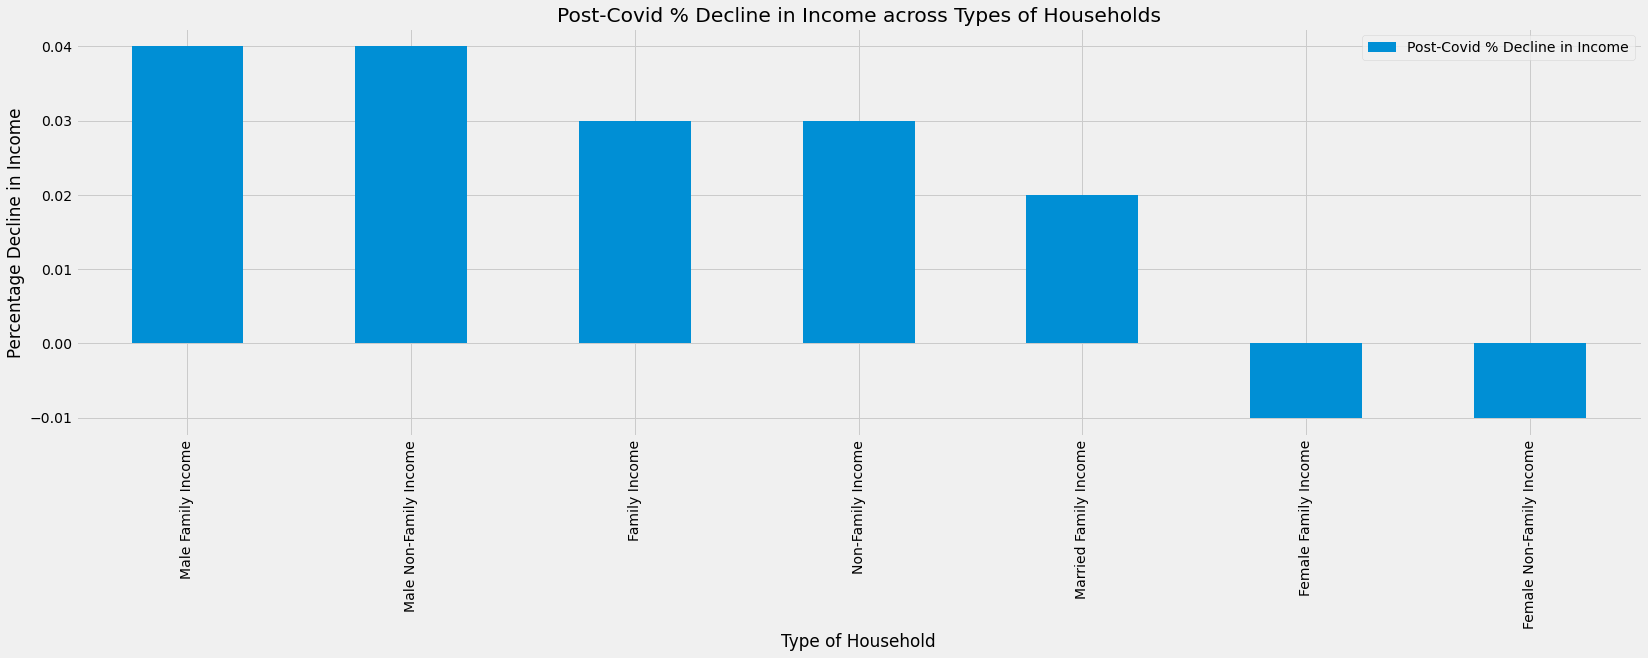

In [32]:
# Plotting post-Covid % decline in income (highest to least)
hh_median_income_decline_comparison_df.plot(x = 'Type of Household', kind = 'bar', title='Post-Covid % Decline in Income across Types of Households')
plt.ylabel("Percentage Decline in Income")
plt.style.use('fivethirtyeight')

### Inferences from Segment III

1. During the analysis of the trickle-down impact, it could be statistically deduced that 2020 real median incomes of family households and nonfamily households decreased 3.2 percent and 3.1 percent from their respective 2019 estimates. This is because there is a higher probability that there could be a more marked decrease in a family's household earnings (considering multiple householders would be employed).


2. The only households to show “increased” income post COVID were female family and non-family households. Despite the irony, the reason earnings grew was because the decline in full-time, year-round workers was concentrated among female workers with lower earnings and female workers in low-wage industries and occupations.


3. This discriminatory characteristic is largely attributed to gender-targeted unemployment either through desired attrition of women or increasingly unfavorable working conditions which force them to resign.

### Conclusion

1. The obvious humanitarian catastrophe aside, the monetary impact of the Coronavirus pandemic has adversely affected both macro-economic and micro-economic structures of the United States. This is also due to qualitative factors such as the Government's ill-preparedness to manage epidemics, restricted access to healthcare, inequitable welfare benefits, poor funding for bio-medical research, etc. Such factors worsen the already shaky economic foundation of disadvantaged and marginalized communities such as people of color, queer individuals, etc.


2. The self-preservation tendencies of corporates has led to unemployment, extended working hours, and wage hits. This has further accelerated the unemployment rates (for example, the Great Resignation). Due to the same, the median income has hit a new low of 3 percent, a figure unprecedented in the last decade in the United States.


3. This analysis statistically backs a long overdue overhaul of the existing discriminatory labor practices and calls for major advancements in corporate ethical governance. Considering the COVID-19 pandemic has hit policymakers and commoners alike, it is imperative to implement legislative changes as swiftly and widely as possible using robust, insightful analyses from qualified data scientists. Such reforms backed by subject matter experts would act as a catalyst for taking significant strides in effectively mitigating the current and any future crisis of this magnitude, while also sustainably improving the common citizen's quality of life.